In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '31e1f021-d108-4d24-a54e-3b0d6286ca3b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-26T13:42:47.291Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11788, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
type(data)

dict

In [7]:
import pandas as pd


#See all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11788,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977326e+07,1.977326e+07,False,NaN,1,NaN,NaN,None,2024-10-26T13:41:00.000Z,66994.682319,3.895883e+10,30.0905,0.095058,-1.203917,-1.655556,4.347596,7.676956,-1.323185,1.324704e+12,58.1580,1.406888e+12,None,2024-10-26T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
1,1027,Ethereum,ETH,ethereum,9450,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203993e+08,1.203993e+08,True,NaN,2,NaN,NaN,None,2024-10-26T13:41:00.000Z,2471.333160,2.130934e+10,28.1747,0.114570,-2.323350,-6.253122,-5.526042,-5.387223,-24.435618,2.975467e+11,13.0631,2.975467e+11,None,2024-10-26T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
2,825,Tether USDt,USDT,tether,101582,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.203045e+11,1.213379e+11,True,NaN,3,NaN,NaN,None,2024-10-26T13:40:00.000Z,0.998737,7.527416e+10,33.4952,0.000799,-0.067228,-0.122205,-0.163884,-0.174456,-0.153827,1.201526e+11,5.2750,1.211847e+11,None,2024-10-26T13:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-26 16:42:54.681648
3,1839,BNB,BNB,bnb,2271,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459312e+08,1.459312e+08,False,NaN,4,NaN,NaN,None,2024-10-26T13:41:00.000Z,582.146980,1.719059e+09,15.2492,-0.163592,-1.448255,-2.412658,-1.846083,5.321712,0.136508,8.495338e+10,3.7297,8.495338e+10,None,2024-10-26T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
4,5426,Solana,SOL,solana,774,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.701959e+08,5.872580e+08,True,NaN,5,NaN,NaN,None,2024-10-26T13:40:00.000Z,168.904557,4.879045e+09,46.3016,0.194080,-2.695338,9.152214,11.107992,9.367992,-9.325460,7.941823e+10,3.4867,9.919055e+10,None,2024-10-26T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
5,3408,USDC,USDC,usd-coin,22671,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.468540e+10,3.468540e+10,False,NaN,6,NaN,NaN,None,2024-10-26T13:40:00.000Z,0.999929,9.505655e+09,37.7767,0.002085,0.007238,0.002226,-0.027835,-0.043855,-0.018966,3.468296e+10,1.5228,3.468296e+10,None,2024-10-26T13:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-26 16:42:54.681648
6,52,XRP,XRP,xrp,1411,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.681186e+10,9.998707e+10,False,NaN,7,NaN,NaN,None,2024-10-26T13:41:00.000Z,0.512977,1.294134e+09,61.4132,-0.204529,-2.055833,-5.837303,-12.934693,-13.311567,-14.887533,2.914321e+10,1.2795,5.129775e+10,None,2024-10-26T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
7,74,Dogecoin,DOGE,dogecoin,1088,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.465281e+11,1.465281e+11,True,NaN,8,NaN,NaN,None,2024-10-26T13:41:00.000Z,0.134296,1.374009e+09,10.3371,-0.379745,-2.582445,-6.961479,17.133890,28.923993,2.669197,1.967808e+10,0.8640,1.967808e+10,None,2024-10-26T13:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-26 16:42:54.681648
8,1958,TRON,TRX,tron,1058,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.648639e+10,

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '31e1f021-d108-4d24-a54e-3b0d6286ca3b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [26]:
import os 
from time import time
from time import sleep

# max per day = 333
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed


KeyboardInterrupt: 

In [ ]:
df

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

In [ ]:
# Сoin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [ ]:
df4 = df3.stack()
df4

In [ ]:
type(df4)

In [ ]:
df5 = df4.to_frame(name='values')
df5

In [ ]:
df5.count()

In [ ]:
# Set the DataFrame index object as the index

index = pd.Index(range(90))
df6 = df5.reset_index()
df6


In [100]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.15755
1,Bitcoin,quote.USD.percent_change_24h,-1.59998
2,Bitcoin,quote.USD.percent_change_7d,-1.86342
3,Bitcoin,quote.USD.percent_change_30d,3.85631
4,Bitcoin,quote.USD.percent_change_60d,7.24020
5,Bitcoin,quote.USD.percent_change_90d,-1.57816
6,Ethereum,quote.USD.percent_change_1h,-0.06856
7,Ethereum,quote.USD.percent_change_24h,-2.68330
8,Ethereum,quote.USD.percent_change_7d,-6.46138
9,Ethereum,quote.USD.percent_change_30d,-6.12047


In [104]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.15755
1,Bitcoin,24h,-1.59998
2,Bitcoin,7d,-1.86342
3,Bitcoin,30d,3.85631
4,Bitcoin,60d,7.24020
5,Bitcoin,90d,-1.57816
6,Ethereum,1h,-0.06856
7,Ethereum,24h,-2.68330
8,Ethereum,7d,-6.46138
9,Ethereum,30d,-6.12047


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [ ]:
# Create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

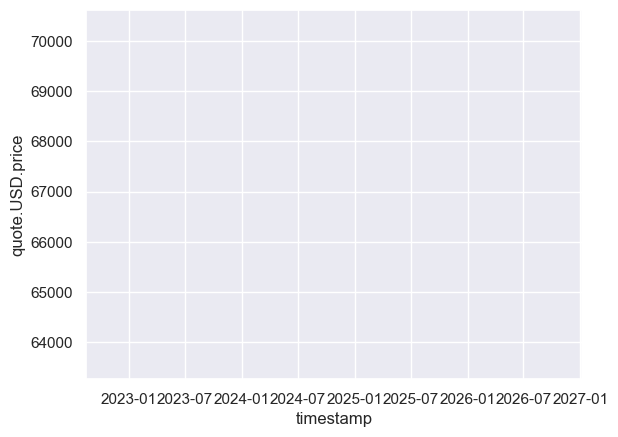

In [112]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)